In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import numpy as np

import skimage.transform
from scipy import ndimage
import scipy.misc

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.axis('off')
  plt.show()

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/ai-challenger/model/showattentell.finetune/', '')
  
import sys, os, math
import gezi, melt
import numpy as np

from deepiu.util import algos_factory
from deepiu.seq2seq.rnn_decoder import SeqDecodeMethod

#debug
from deepiu.util import text2ids

TEXT_MAX_WORDS = 100    
decode_max_words = 20


from deepiu.util import ids2text
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/char/vocab.txt'
ids2text.init(vocab_path)

image_dir = image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
image_path = os.path.join(image_dir, image_file)
image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'
image_model_name='InceptionResnetV2'
FLAGS.model_dir = model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v3/showandtell.char/'


if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      model_name=image_model_name)
else:
  image_model = None

tensorflow_version: 1.3.0


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/char/vocab.txt
INFO:tensorflow:Created vocabulary with 2443 words
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


ENCODE_UNK 1


image_model feature_name is None will get PreLogits
image_feature: Tensor("InceptionResnetV2/Logits/Dropout/Identity:0", shape=(?, 1536), dtype=float32)
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten/Reshape:0", shape=(?, 98304), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 13.738296032


In [2]:
FLAGS.image_encoder = 'ShowAndTell'
FLAGS.showtell_encode_scope = 'encode'
FLAGS.showtell_decode_scope = 'decode'
FLAGS.image_attention_size = 64 
FLAGS.image_endpoint_feature_name = None
FLAGS.image_model = 'InceptionResnetV2'
FLAGS.image_checkpoint_file = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt' 
FLAGS.pre_calc_image_feature = True
FLAGS.emb_dim = 512 
FLAGS.rnn_hidden_size = 512 
FLAGS.image_feature_len = 1536
FLAGS.alignment_history = True

beam_size = 10
length_normalization_factor = 0.25

In [3]:
algo = 'show_and_tell'
global_scope = algo
main_scope = 'main'
melt.apps.image_processing.init()
with tf.variable_scope(global_scope):
  with tf.variable_scope(main_scope):
    predictor =  algos_factory.gen_predictor(algo)
    predictor.init_predict_text(decode_method=SeqDecodeMethod.ingraph_beam, 
                                beam_size=beam_size,
                                length_normalization_factor=length_normalization_factor,
                                logprobs_history=True)  

predictor.load(FLAGS.model_dir) 

cell: <class 'tensorflow.python.ops.rnn_cell_impl.BasicLSTMCell'>
rnn decoder gen only mode


attention_option: luong
INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/ai-challenger/model.v3/showandtell.char/model.ckpt-2.1-70000
restore ok: /home/gezi/new/temp/image-caption/ai-challenger/model.v3/showandtell.char/model.ckpt-2.1-70000


load model ok /home/gezi/new/temp/image-caption/ai-challenger/model.v3/showandtell.char/model.ckpt-2.1-70000 duration: 2.1704621315


In [7]:
def predict(image_path, predictor):
  timer = gezi.Timer('beam search using time')
  img = melt.read_image(image_path)
  if image_model:
    feature = image_model.gen_feature(img) if image_model is not None else img
  else:
    feature = [img]    

  logprobs_history = None 

  l = predictor.predict_text(feature)
  timer.print()
  texts_list, scores_list= l[0], l[1]
  try:
    logprobs_history = l[2]
  except Exception:
    pass

  #print(alignment_history)

  texts = texts_list[0]
  scores = scores_list[0]
  if logprobs_history is not None:
    logprobs = logprobs_history[0]
  else:
    logprobs = [None] * len(texts)

  logprob = None 
  alignment = None 
    
  for text, score, logprob, in zip(texts, scores, logprobs):
    print(ids2text.ids2text(text), score, 'len_text', len(text))
    #print(text, len(text))
    if logprob is not None:
      #print(map(math.exp, logprob))
      print('|'.join(['%s %.2f'%(ids2text.vocab.key(int(t)), math.exp(logp)) for t, logp in zip(text, logprob)]))

In [8]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: a7f2dda872d202b8e4834c0c6bfaee92c0d048db


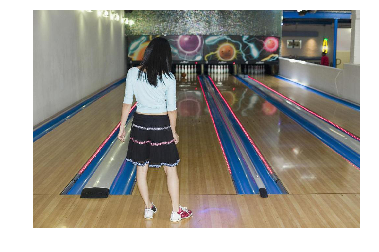

beam search using time duration: 1.05383515358


一 个 右 手 拿 着 手 机 的 女 人 走 在 大 厅 里 </S> 0.0413292
[ 5  2 28 14 22  4 14 96  1 13  3 27  8 65 69 19  7  0  0  0  0  0  0  0  0
  0  0  0  0  0] 30
一 0.50|个 0.98|右 0.19|手 0.70|拿 0.43|着 0.98|手 0.31|机 0.99|的 0.96|女 0.97|人 1.00|走 0.45|在 1.00|大 0.57|厅 1.00|里 0.98|</S> 0.79|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 右 肩 背 着 包 的 女 人 走 在 大 厅 里 </S> 0.034168
[  5   2  28 142  85   4  59   1  13   3  27   8  65  69  19   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0] 30
一 0.50|个 0.98|右 0.19|肩 0.22|背 0.84|着 0.96|包 0.98|的 0.98|女 0.95|人 1.00|走 0.39|在 1.00|大 0.40|厅 1.00|里 0.97|</S> 0.50|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 右 手 拿 着 手 机 的 女 人 站 在 大 厅 里 </S> 0.0276801
[ 5  2 28 14 22  4 14 96  1 13  3 20  8 65 69 19  7  0  0  0  0  0  0  0  0
  0  0  0  0  0] 30
一 0.50|个 0

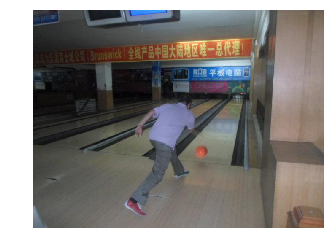

beam search using time duration: 1.52296805382


一 个 左 手 拿 着 东 西 的 男 人 走 在 大 厅 里 </S> 0.0342605
[ 5  2 39 14 22  4 91 64  1 10  3 27  8 65 69 19  7  0  0  0  0  0  0  0  0
  0  0  0  0  0] 30
一 0.44|个 0.97|左 0.15|手 0.94|拿 0.68|着 1.00|东 0.17|西 1.00|的 0.94|男 0.79|人 0.99|走 0.56|在 1.00|大 0.42|厅 0.99|里 0.97|</S> 0.90|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 右 手 拿 着 东 西 的 男 人 走 在 大 厅 里 </S> 0.0328757
[ 5  2 28 14 22  4 91 64  1 10  3 27  8 65 69 19  7  0  0  0  0  0  0  0  0
  0  0  0  0  0] 30
一 0.44|个 0.97|右 0.22|手 0.94|拿 0.77|着 1.00|东 0.10|西 1.00|的 0.95|男 0.78|人 0.99|走 0.53|在 1.00|大 0.42|厅 0.99|里 0.97|</S> 0.89|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 右 手 拿 着 球 杆 的 男 人 走 在 大 厅 里 </S> 0.031016
[ 5  2 28 14 22  4 11 95  1 10  3 27  8 65 69 19  7  0  0  0  0  0  0  0  0
  0  0  0  0  0] 30
一 0.44|个 0.97|右 0.22|手 0.94|拿 0.77|着 1.00|

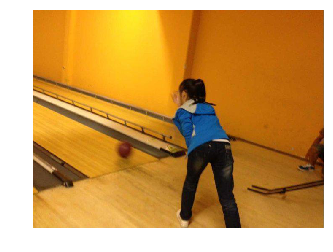

beam search using time duration: 0.919184923172


一 个 穿 着 黑 色 裤 子 的 男 人 在 舞 台 上 跳 舞 </S> 0.0204125
[  5   2  12   4  76  30  71  18   1  10   3   8  41  35   9 183  41   7
   0   0   0   0   0   0   0   0   0   0   0   0] 30
一 0.40|个 0.97|穿 0.46|着 0.99|黑 0.25|色 1.00|裤 0.41|子 1.00|的 0.97|男 0.72|人 0.97|在 0.41|舞 0.27|台 0.97|上 0.99|跳 0.29|舞 0.88|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 穿 着 黑 色 裤 子 的 男 人 在 舞 台 上 表 演 节 目 </S> 0.0203508
[  5   2  12   4  76  30  71  18   1  10   3   8  41  35   9 107 103 269
 246   7   0   0   0   0   0   0   0   0   0   0] 30
一 0.40|个 0.97|穿 0.46|着 0.99|黑 0.25|色 1.00|裤 0.41|子 1.00|的 0.97|男 0.72|人 0.97|在 0.41|舞 0.27|台 0.97|上 0.99|表 0.46|演 1.00|节 0.45|目 0.99|</S> 0.99|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 穿 着 黑 色 裤 子 的 男 人 在 舞 台 上 表 演 </S> 0.0158461
[  5   2  12   4  76  30  71  18   1  10   3   8  41  35   9 107 103   7
   0   0  

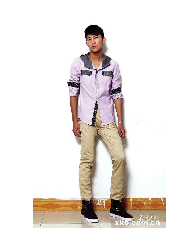

beam search using time duration: 1.31231093407


房 间 里 站 着 一 个 双 手 插 在 口 袋 里 的 男 人 </S> 0.0555306
[ 37  53  19  20   4   5   2  34  14 124   8 146 167  19   1  10   3   7
   0   0   0   0   0   0   0   0   0   0   0   0] 30
房 0.10|间 0.68|里 0.90|站 0.51|着 1.00|一 1.00|个 0.99|双 0.38|手 0.95|插 0.47|在 0.74|口 0.74|袋 0.99|里 0.98|的 0.99|男 0.95|人 0.99|</S> 1.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 双 手 插 在 口 袋 里 的 男 人 站 在 屋 子 里 </S> 0.0478727
[  5   2  34  14 124   8 146 167  19   1  10   3  20   8  46  18  19   7
   0   0   0   0   0   0   0   0   0   0   0   0] 30
一 0.55|个 0.98|双 0.26|手 0.96|插 0.64|在 0.57|口 0.74|袋 1.00|里 0.99|的 0.99|男 0.93|人 1.00|站 0.68|在 1.00|屋 0.11|子 0.94|里 0.98|</S> 0.86|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00|<PAD> 0.00
一 个 双 手 插 在 口 袋 里 的 男 人 站 在 房 间 里 </S> 0.0443527
[  5   2  34  14 124   8 146 167  19   1  10   3  20   8  37  53  19   7
   0  

In [ ]:
while True:
  image_name = raw_input('image_name like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip()
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
        continue
  plt.subplot(1, 1, 1)
  image_show(image_path)
  predict(image_path, predictor)
  #predict(image_path, predictor2, gen_feature=False)

In [ ]:
import glob 
for img in glob.glob('/home/gezi/new2/data/ai_challenger/image_caption/test_pic/*.jpg'):
    image_show(img)
    predict(img, predictor)